<br>
<br>
<br>
# 연관규칙분석 - 공생앱과 경쟁앱
<br>

---

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)
pd.set_option('max_rows',100)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [3]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path) # 얘네는 한번 선언만 하면 됨

In [37]:
DA_final = pd.read_csv("DA_final.csv")

AR_App = pd.read_csv('AR_target_app.csv')

In [38]:
# 분류기 만들때 쓸 변수들!
# 여기에 목적 앱 바이너리 컬럼을 붙이고, 그걸 이 데이터를 통해 맞추는 식으로 하면 된다!
# app 변수 목록에 타겟 앱이 없도록 주의!
# 예륻 들어 스타벅스의 경우 app_스타벅스를 빼고, AR_App의 스타벅스 컬럼을 타겟으로 분류기 만들면 됨

DA_final.head()

,pid,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,A0002542,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,A0003204,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,A0003768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,A0008228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [39]:
freq_movie_hotel = AR_App[['panel_id','메가박스','CGV','롯데시네마','여기어때','야놀자']]

In [40]:
# 이미 알지만 freq check

freq_movie_hotel.sum()

panel_id    A0002542A0003204A0003696A0003768A0008228A00091...
메가박스                                                      717
CGV                                                      1891
롯데시네마                                                     954
여기어때                                                      501
야놀자                                                       600
dtype: object

In [41]:
freq_movie_hotel['영화_3사'] = freq_movie_hotel['메가박스'] + freq_movie_hotel['CGV'] + freq_movie_hotel['롯데시네마']
freq_movie_hotel['영화_3사'] = freq_movie_hotel['영화_3사'].map(lambda x: x if x < 1 else 1)
freq_movie_hotel['숙박_2사'] = (freq_movie_hotel['여기어때'] + freq_movie_hotel['야놀자']).map(lambda x: x if x < 1 else 1)
freq_movie_hotel['영화_숙박_둘다'] = (freq_movie_hotel['영화_3사'] + freq_movie_hotel['숙박_2사']).map(lambda x: 0 if x < 2 else 1)
freq_movie_hotel['영화만'] = (freq_movie_hotel['영화_3사'] - freq_movie_hotel['영화_숙박_둘다']).map(lambda x: 0 if x < 1 else 2)
freq_movie_hotel['숙박만'] = (freq_movie_hotel['숙박_2사'] - freq_movie_hotel['영화_숙박_둘다']).map(lambda x: 0 if x < 1 else 3)

freq_movie_hotel['movie_hotel_target'] = (freq_movie_hotel['영화만'] + freq_movie_hotel['숙박만'] + freq_movie_hotel['영화_숙박_둘다'])
freq_movie_hotel = freq_movie_hotel[['panel_id', 'movie_hotel_target']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [43]:
freq_movie_hotel['movie_hotel_target'].value_counts()

0    6517
2    2274
3     479
1     411
Name: movie_hotel_target, dtype: int64

In [44]:
del DA_final['App_CGV']
del DA_final['App_메가박스']
del DA_final['App_롯데시네마']
del DA_final['App_여기어때']
del DA_final['App_야놀자']
del DA_final['Mean_CGV']
del DA_final['Mean_메가박스']
del DA_final['Mean_롯데시네마']
del DA_final['Mean_여기어때']
del DA_final['Mean_야놀자']
del DA_final['Std_CGV']
del DA_final['Std_메가박스']
del DA_final['Std_롯데시네마']
del DA_final['Std_여기어때']
del DA_final['Std_야놀자']

In [45]:
DA_movie_hotel = freq_movie_hotel.merge(DA_final, how='left', left_on='panel_id', right_on='pid')

In [46]:
del DA_movie_hotel['panel_id']
del DA_movie_hotel['pid']

In [47]:
DA_movie_hotel.head()

,movie_hotel_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


In [48]:
del DA_movie_hotel['App_엔터테인먼트']
del DA_movie_hotel['App_여행 및 지역정보']

In [49]:
cat_col = ['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']

column_dict = pd.DataFrame(DA_movie_hotel.columns).reset_index().rename(columns={'index':'feature_number', 0:'feature'})
num_cat_col = list(column_dict[lambda x: x['feature'].isin(cat_col)]['feature_number'])

In [50]:

DA_movie_hotel[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']] = \
DA_movie_hotel[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']].fillna(0).applymap(lambda x: str(int(x)))

In [51]:
DA_movie_hotel = DA_movie_hotel.fillna(0)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [52]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split

# Models for Classification
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier

In [53]:
from sklearn import pipeline, metrics
from sklearn.utils import shuffle

from sklearn.metrics import auc, f1_score, accuracy_score, log_loss
my_scorer = metrics.make_scorer(auc, greater_is_better = True)

In [54]:
DA_movie_hotel.head()

,movie_hotel_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


In [55]:
features = DA_movie_hotel.columns[1:]

In [56]:
cbc = CatBoostClassifier(
 learning_rate =0.1,
 iterations=400,
 loss_function='MultiClass'
)

In [57]:
cbc.fit(DA_movie_hotel[features], DA_movie_hotel['movie_hotel_target'], cat_features=num_cat_col)

0:	learn: -1.2777863	total: 995ms	remaining: 6m 37s
1:	learn: -1.1968762	total: 1.53s	remaining: 5m 5s
2:	learn: -1.1360703	total: 2.1s	remaining: 4m 37s
3:	learn: -1.0856687	total: 2.63s	remaining: 4m 20s
4:	learn: -1.0406883	total: 2.95s	remaining: 3m 53s
5:	learn: -1.0064877	total: 3.3s	remaining: 3m 36s
6:	learn: -0.9768187	total: 3.62s	remaining: 3m 23s
7:	learn: -0.9500679	total: 4s	remaining: 3m 16s
8:	learn: -0.9290570	total: 4.32s	remaining: 3m 7s
9:	learn: -0.9107126	total: 4.63s	remaining: 3m
10:	learn: -0.8947203	total: 4.95s	remaining: 2m 55s
11:	learn: -0.8802020	total: 5.32s	remaining: 2m 51s
12:	learn: -0.8676486	total: 5.64s	remaining: 2m 48s
13:	learn: -0.8563054	total: 5.98s	remaining: 2m 44s
14:	learn: -0.8473561	total: 6.29s	remaining: 2m 41s
15:	learn: -0.8385288	total: 6.66s	remaining: 2m 39s
16:	learn: -0.8309219	total: 6.96s	remaining: 2m 36s
17:	learn: -0.8244259	total: 7.28s	remaining: 2m 34s
18:	learn: -0.8176804	total: 7.59s	remaining: 2m 32s
19:	learn: -0.

155:	learn: -0.6655279	total: 51.9s	remaining: 1m 21s
156:	learn: -0.6652589	total: 52.2s	remaining: 1m 20s
157:	learn: -0.6650095	total: 52.5s	remaining: 1m 20s
158:	learn: -0.6647760	total: 52.9s	remaining: 1m 20s
159:	learn: -0.6642763	total: 53.2s	remaining: 1m 19s
160:	learn: -0.6636296	total: 53.6s	remaining: 1m 19s
161:	learn: -0.6633294	total: 53.9s	remaining: 1m 19s
162:	learn: -0.6627339	total: 54.2s	remaining: 1m 18s
163:	learn: -0.6625483	total: 54.6s	remaining: 1m 18s
164:	learn: -0.6618506	total: 54.9s	remaining: 1m 18s
165:	learn: -0.6609069	total: 55.2s	remaining: 1m 17s
166:	learn: -0.6605310	total: 55.5s	remaining: 1m 17s
167:	learn: -0.6603768	total: 55.8s	remaining: 1m 17s
168:	learn: -0.6599176	total: 56.2s	remaining: 1m 16s
169:	learn: -0.6595654	total: 56.5s	remaining: 1m 16s
170:	learn: -0.6584781	total: 56.8s	remaining: 1m 16s
171:	learn: -0.6578973	total: 57.1s	remaining: 1m 15s
172:	learn: -0.6574057	total: 57.5s	remaining: 1m 15s
173:	learn: -0.6567856	total

309:	learn: -0.6018926	total: 1m 42s	remaining: 29.7s
310:	learn: -0.6017112	total: 1m 42s	remaining: 29.4s
311:	learn: -0.6012539	total: 1m 43s	remaining: 29.1s
312:	learn: -0.6011623	total: 1m 43s	remaining: 28.7s
313:	learn: -0.6007061	total: 1m 43s	remaining: 28.4s
314:	learn: -0.6002687	total: 1m 44s	remaining: 28.1s
315:	learn: -0.5996414	total: 1m 44s	remaining: 27.7s
316:	learn: -0.5994590	total: 1m 44s	remaining: 27.4s
317:	learn: -0.5990412	total: 1m 44s	remaining: 27.1s
318:	learn: -0.5989170	total: 1m 45s	remaining: 26.8s
319:	learn: -0.5981919	total: 1m 45s	remaining: 26.4s
320:	learn: -0.5980706	total: 1m 45s	remaining: 26.1s
321:	learn: -0.5978236	total: 1m 46s	remaining: 25.7s
322:	learn: -0.5974422	total: 1m 46s	remaining: 25.4s
323:	learn: -0.5967863	total: 1m 46s	remaining: 25.1s
324:	learn: -0.5963337	total: 1m 47s	remaining: 24.8s
325:	learn: -0.5957407	total: 1m 47s	remaining: 24.4s
326:	learn: -0.5953340	total: 1m 47s	remaining: 24.1s
327:	learn: -0.5946778	total

In [58]:
cbc.score(DA_movie_hotel[features], DA_movie_hotel['movie_hotel_target'])

0.79382295217436216

In [24]:
from catboost import Pool
p = Pool(DA_movie_hotel[features], DA_movie_hotel['movie_hotel_target'], cat_features=num_cat_col)

In [36]:
cbc.get_feature_importance(p)

[0.0,
 0.0,
 0.0,
 0.0,
 0.00047017635715202594,
 0.026165432841094807,
 0.0008627570768293623,
 0.0,
 0.0,
 0.000479006213475727,
 1.0896387915131351,
 0.2119242227162503,
 0.007290271171297762,
 0.0,
 0.03184429204799663,
 0.0,
 0.0,
 0.0003355660263219352,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06719719048050589,
 0.2607406987332754,
 0.008369495168006467,
 0.007314072378034687,
 0.0,
 0.5572303658909025,
 0.6317873032953775,
 0.0,
 0.039457047788559886,
 0.010398191418541652,
 0.0,
 0.00041288375327790876,
 0.0,
 1.0595164588935643e-05,
 0.002037633715653166,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01869927203776246,
 5.577173349699524,
 0.0,
 0.0006749277393866814,
 0.013609271834317163,
 0.00512646815169255,
 0.01175647427065792,
 0.0,
 0.0,
 0.0004632918049985893,
 0.03500981238277386,
 0.0023574987154506297,
 0.0,
 0.22497392920836565,
 0.0225885074398567,
 0.001394300383613573,
 0.0,
 0.0009903484443876025,
 0.0,
 0.01654531351164592,
 0.005929756306422097,
 0.0,
 0.00279896009035884

In [37]:
cbc.eval_metrics(p, 
             metrics = ['Accuracy','AUC'])

{'AUC:class=0': [0.6787768138062331,
  0.6960798287547865,
  0.7190021546293298,
  0.7276581117128847,
  0.7356435478386102,
  0.7443100045451485,
  0.7472690310880015,
  0.7480897475764542,
  0.7535760551951358,
  0.7570029332988293,
  0.7598318906091566,
  0.7626583503186357,
  0.7651079147855449,
  0.7677128882217412,
  0.7693199125034651,
  0.7717845353211197,
  0.7728509381376762,
  0.7757651533565719,
  0.7774361938153778,
  0.778639406961895,
  0.7801889621755568,
  0.7812258787529727,
  0.7820950923452753,
  0.7825757956386361,
  0.782656300831027,
  0.7834085394088436,
  0.7846575823184991,
  0.7852375106863368,
  0.7853638941389698,
  0.7868534341866172,
  0.7877065467404417,
  0.788819943250629,
  0.7897802344039618,
  0.7909296642623096,
  0.7910465907796917,
  0.7917350556659457,
  0.7921828779228962,
  0.7925952002998284,
  0.7927254150236656,
  0.7940771263021715,
  0.7943896901364844,
  0.7947568132126286,
  0.794810644997902,
  0.7952336367376813,
  0.7956630300951688,

In [31]:
len(features)

986

In [30]:
len(cbc.get_feature_importance(p))

985

In [59]:
movie_hotel_FE = pd.DataFrame(features)
movie_hotel_FE['importance'] = cbc.get_feature_importance(p)
movie_hotel_FE = movie_hotel_FE.rename(columns={0:'feature'})

In [60]:
movie_hotel_FE.sort_values(by='importance', ascending=False)

,feature,importance
45,Location_Movie Theater,3.390739
430,PS_family_00s,2.937427
411,PS_BirthYear,2.634668
412,PS_wedding,2.512130
147,App_CJ ONE,2.299001
90,App_app_counted,2.251701
120,App_식음료,2.092000
91,App_app_count_mean,1.891362
92,App_app_counted_gap,1.861834
438,PS_age,1.367888


In [77]:
DA_movie_hotel['movie_hotel_target_str'] = DA_movie_hotel['movie_hotel_target'].map(lambda x: 'Neither' if x == 0 
                            else 'Both' if x == 1
                            else 'Movie_only' if x == 2
                            else 'Hotel_only')

In [78]:
DA_movie_hotel.groupby('movie_hotel_target_str')['App_app_count_mean'].agg([np.mean, np.std, np.median])

,mean,std,median
movie_hotel_target_str,,,
Both,48.705596,14.716375,46.1
Hotel_only,41.733403,14.117084,39.4
Movie_only,47.611434,17.307293,44.9
Neither,38.522802,16.482335,35.8


In [82]:
DA_movie_hotel_1 = DA_movie_hotel[lambda x: x['App_app_count_mean'] < 80]

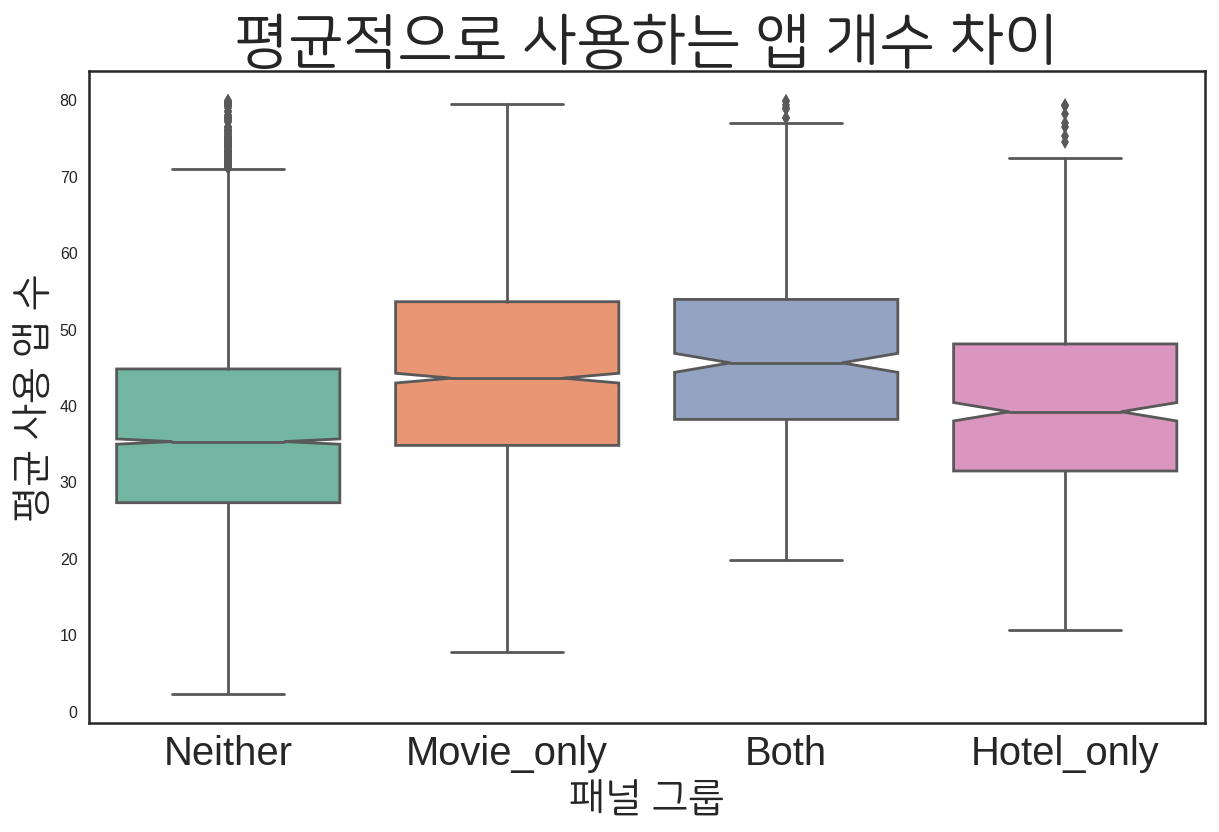

In [83]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'movie_hotel_target_str', y = 'App_app_count_mean', data = DA_movie_hotel_1, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('평균 사용 앱 수', fontproperties=fontprop, fontsize=20)
plt.title('평균적으로 사용하는 앱 개수 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [64]:
DA_movie_hotel.groupby('movie_hotel_target')['PS_family_00s'].agg([np.mean, np.std, np.median])

,mean,std,median
movie_hotel_target,,,
0,0.421053,0.705872,0
1,0.131387,0.433097,0
2,0.243624,0.542530,0
3,0.308977,0.627593,0


In [95]:
DA_movie_hotel['PS_family_00s_binary'] = DA_movie_hotel['PS_family_00s'].map(lambda x: 1 if x > 0 else 0)

In [100]:
tmp1 = DA_movie_hotel.groupby(['movie_hotel_target_str','PS_family_00s_binary'])['PS_family_00s'].count().reset_index()

In [106]:
tmp1 = tmp1.set_index(['movie_hotel_target_str','PS_family_00s_binary']).unstack().reset_index()

In [110]:
tmp1.columns = tmp1.columns.droplevel()

In [113]:
tmp1 = tmp1.rename(columns={'':'class'}).reset_index(drop=True)

In [116]:
tmp1['rate'] = tmp1[1]/(tmp1[0] + tmp1[1])

In [117]:
tmp1

PS_family_00s_binary,class,0,1,rate
0,Both,369,42,0.102190
1,Hotel_only,370,109,0.227557
2,Movie_only,1841,433,0.190413
3,Neither,4530,1987,0.304895


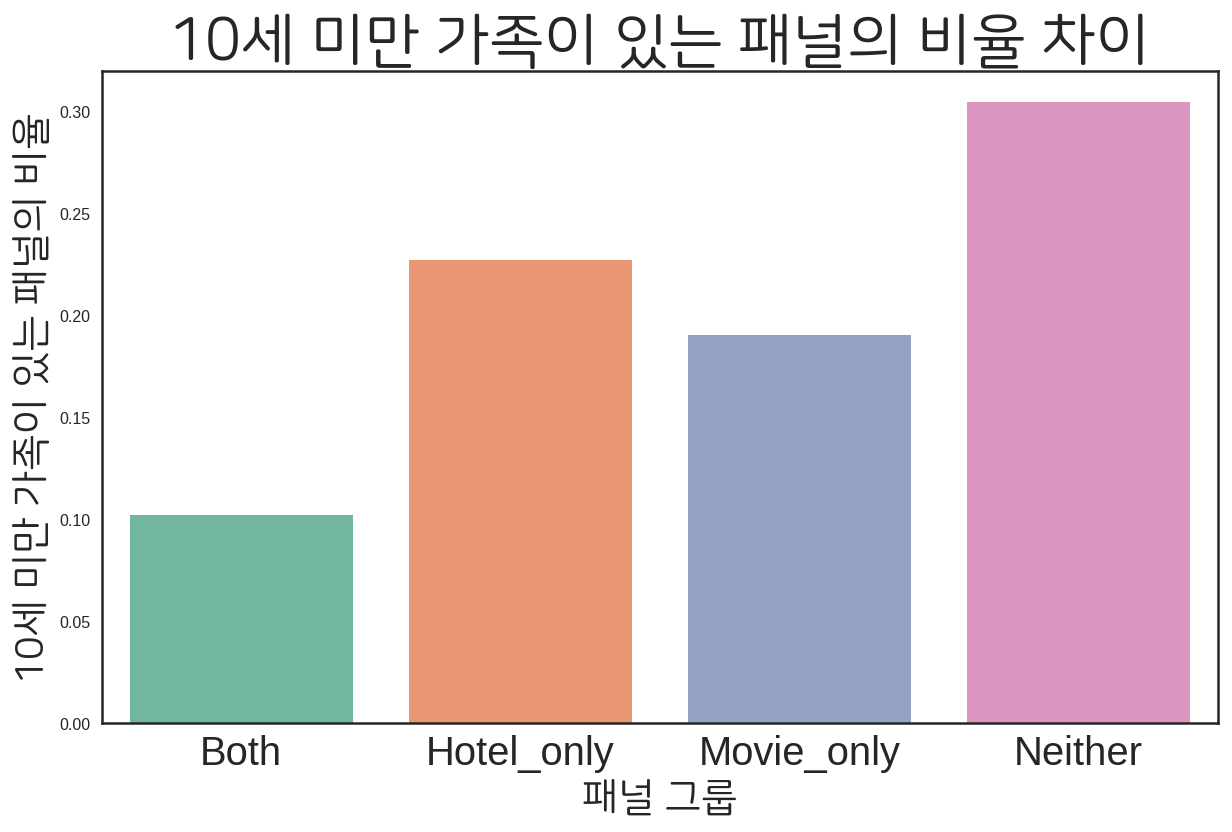

In [119]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'class', y = 'rate', data = tmp1, palette = "Set2")

plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('10세 미만 가족이 있는 패널의 비율', fontproperties=fontprop, fontsize=20)
plt.title('10세 미만 가족이 있는 패널의 비율 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [65]:
DA_movie_hotel.groupby('movie_hotel_target')['PS_age'].agg([np.mean, np.std, np.median])

,mean,std,median
movie_hotel_target,,,
0,36.674697,10.981780,37.0
1,30.613139,7.289064,29.0
2,35.186016,9.292820,35.0
3,32.885177,8.588292,32.0


In [121]:
DA_movie_hotel_2 = DA_movie_hotel[lambda x: x['PS_age'] < 70]

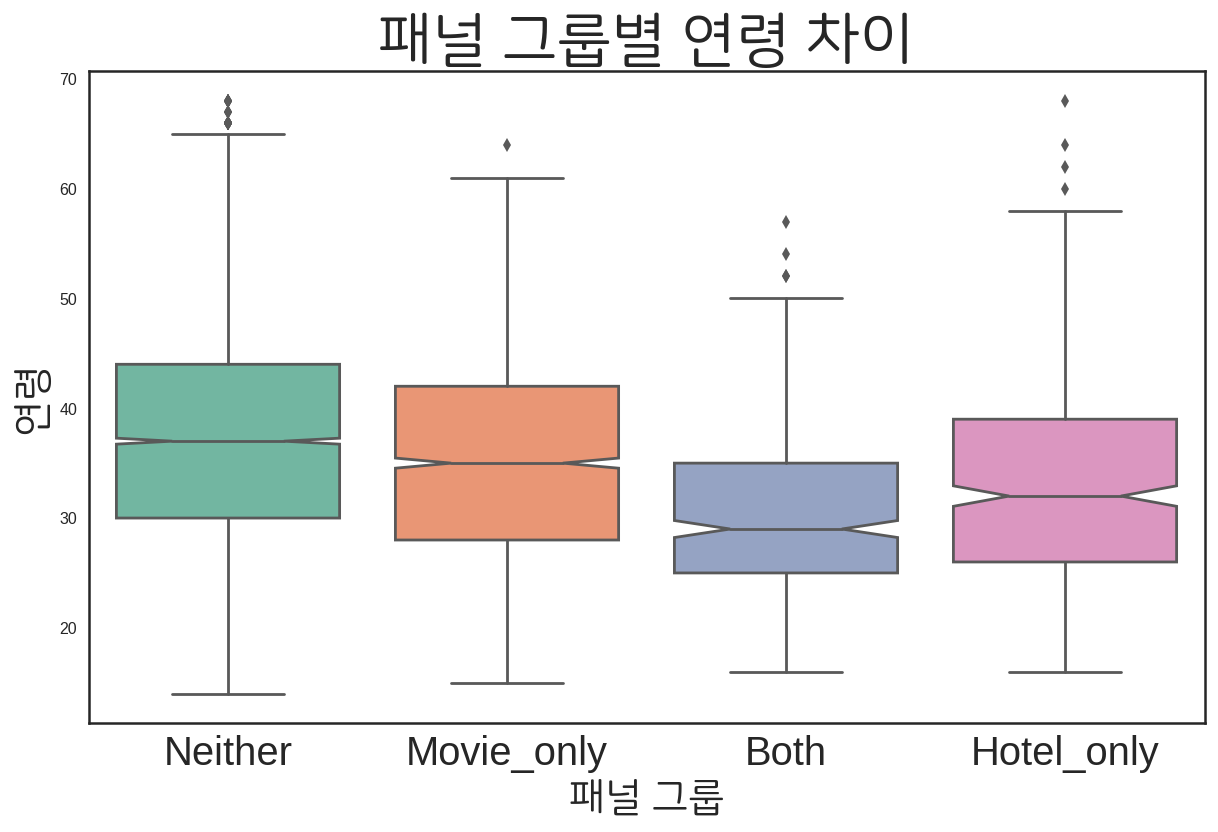

In [123]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'movie_hotel_target_str', y = 'PS_age', data = DA_movie_hotel_2, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('연령', fontproperties=fontprop, fontsize=20)
plt.title('패널 그룹별 연령 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [69]:
DA_movie_hotel.groupby('movie_hotel_target')['App_Facebook'].agg([np.mean, np.std, np.median])

,mean,std,median
movie_hotel_target,,,
0,3.501611,4.425275,0.0
1,6.287105,4.558060,10.0
2,4.187775,4.574688,1.0
3,5.269311,4.672151,7.0


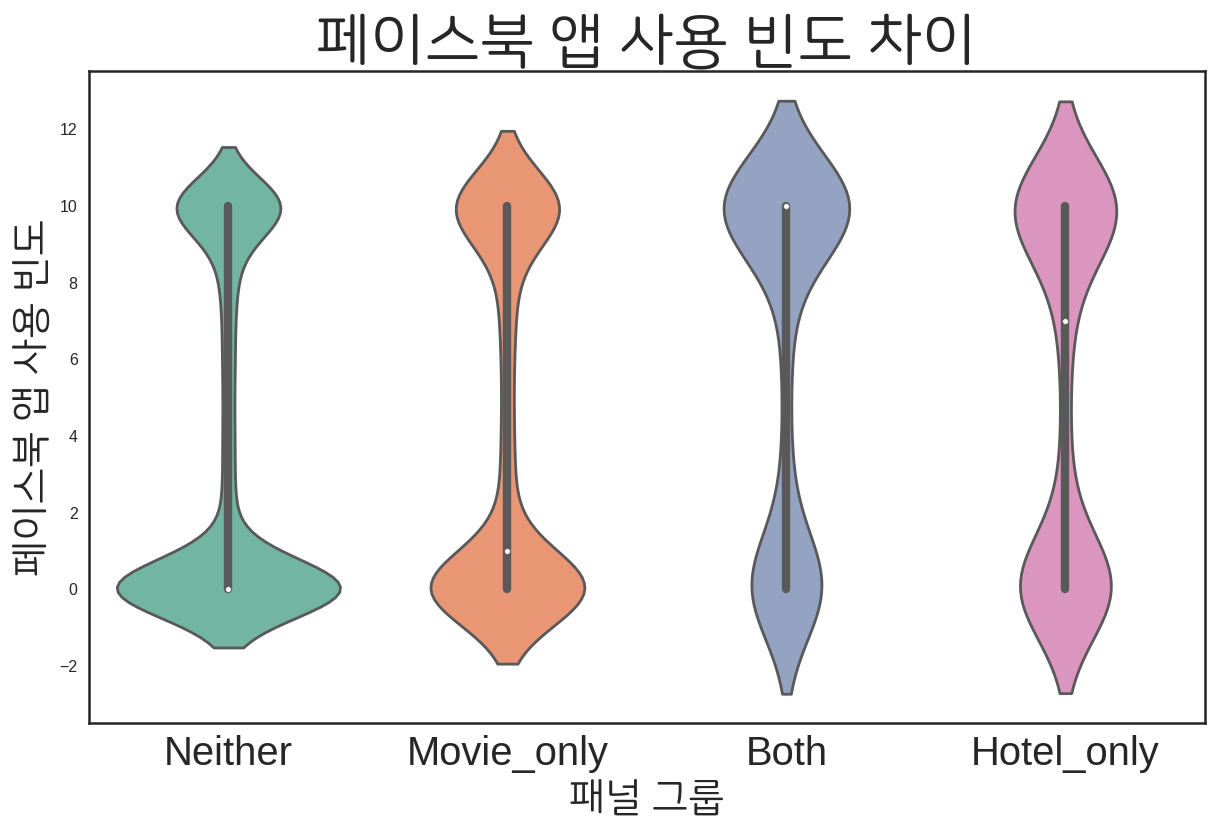

In [125]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'movie_hotel_target_str', y = 'App_Facebook', data = DA_movie_hotel, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('페이스북 앱 사용 빈도', fontproperties=fontprop, fontsize=20)
plt.title('페이스북 앱 사용 빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()